# 🛒 Supermarket Sales Analysis

This notebook analyzes supermarket sales data to understand top-selling products, revenue trends, and customer behavior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📂 Load the Dataset

Here we load sales and item details CSV files using pandas.

In [2]:
# Load data
item_df = pd.read_csv("annex1.csv")
sales_df = pd.read_csv("annex2.csv")
wholesale_df = pd.read_csv("annex3.csv")
loss_df = pd.read_csv("annex4.csv")

In [3]:
# Preview
item_df.head()
sales_df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


## 🧩 Merging Sales & Item Data

In [4]:
# Merging sales with item data
merged_df = sales_df.merge(item_df, on='Item Code', how='left')

In [7]:
# Creating a new column 'Revenue' by multiplying quantity sold and unit selling price
merged_df['Revenue'] = merged_df['Quantity Sold (kilo)'] * merged_df['Unit Selling Price (RMB/kg)']

In [8]:
# Finding top 10 items by total quantity sold
top_items = merged_df.groupby('Item Name')['Quantity Sold (kilo)'].sum().sort_values(ascending=False).head(10)

## 📦 Top 10 Items by Quantity Sold

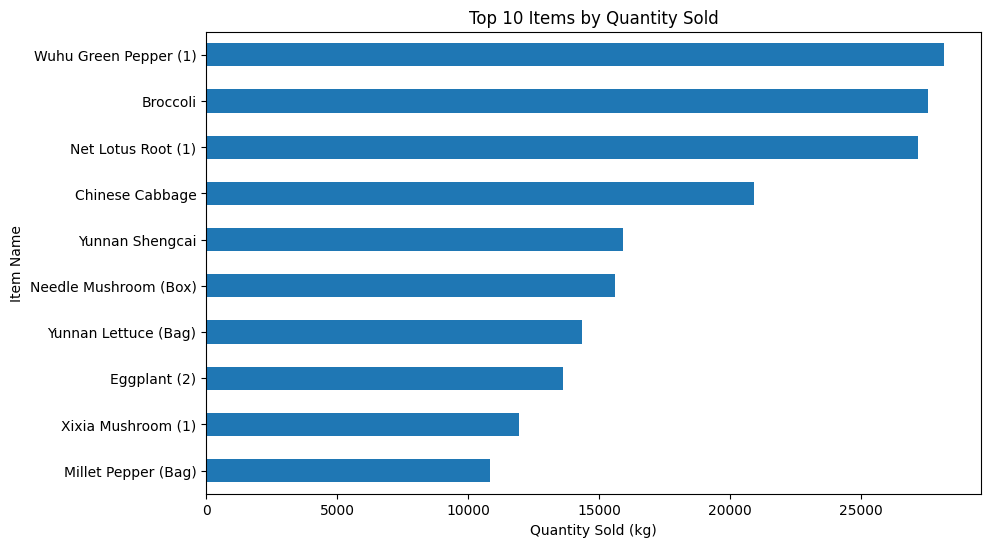

In [12]:
# Plotting horizontal bar chart to show top 10 items by quantity sold
top_items.plot(kind='barh', figsize=(10,6))
# Adding title to the chart
plt.title('Top 10 Items by Quantity Sold')
# Label for the X-axis showing quantity in kg
plt.xlabel('Quantity Sold (kg)')
# Label for the Y-axis showing item names
plt.ylabel('Item Name')
# Reversing the Y-axis to show the highest selling item on top
plt.gca().invert_yaxis()
# Display the chart
plt.show()

In [13]:
# Grouping by Item Name to calculate total revenue per item and getting top 10
top_revenue_items = merged_df.groupby('Item Name')['Revenue'].sum().sort_values(ascending=False).head(10)

## 💰 Top 10 Items by Revenue
We calculate revenue for each item (Quantity × Rate) and visualize the top 10 items earning the highest total revenue.

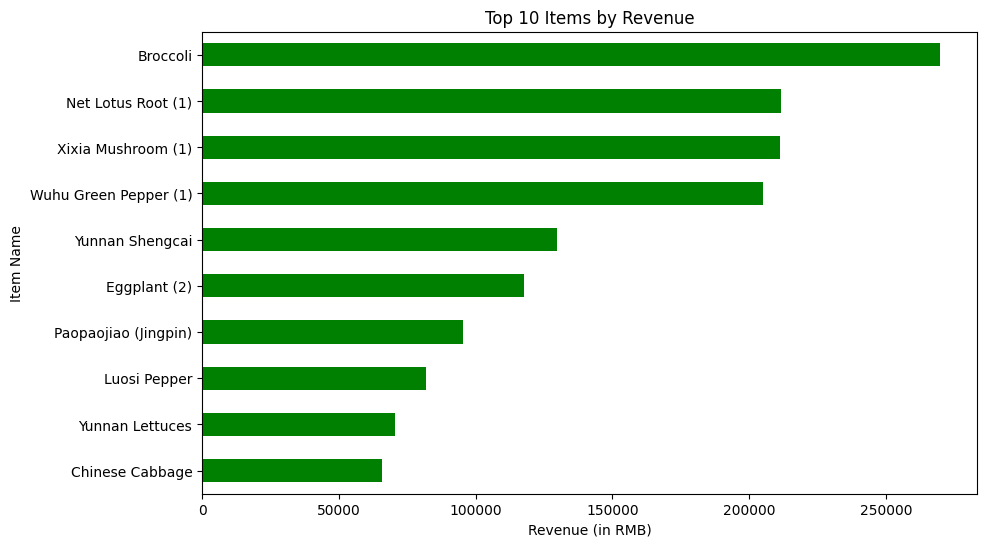

In [14]:
# Plotting the top 10 items by revenue
top_revenue_items.plot(kind='barh', figsize=(10,6), color='green')
plt.title('Top 10 Items by Revenue')
plt.xlabel('Revenue (in RMB)')
plt.ylabel('Item Name')
plt.gca().invert_yaxis()
plt.show()

In [15]:
# Total revenue per day
daily_sales = merged_df.groupby('Date')['Revenue'].sum().sort_values(ascending=False)

## 📅 Top 10 Revenue-Generating Days
We group the data by invoice date and calculate total revenue for each day. Then we sort it to find the top 10 days with the highest revenue.

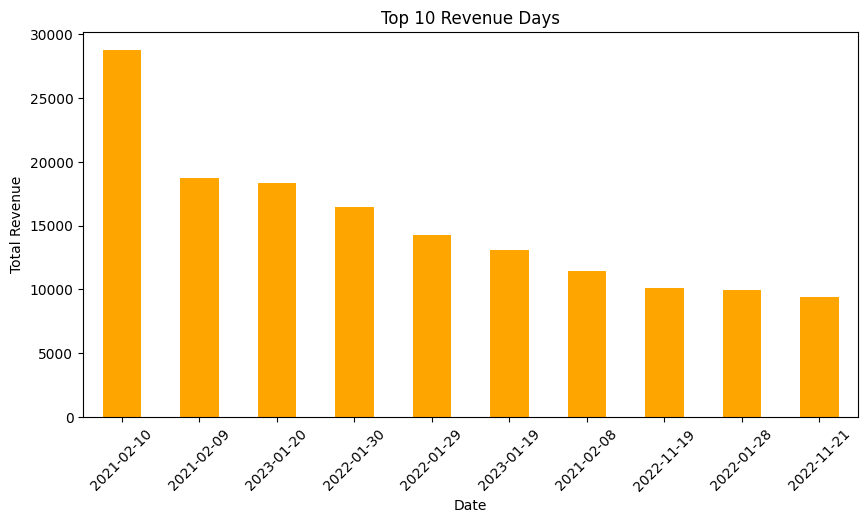

In [16]:
# Plotting top 10 dates with highest revenue
daily_sales.head(10).plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 10 Revenue Days')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## 🔁 Sales vs Return Revenue Comparison
We separate normal sales and returned items based on their type, and calculate total revenue for each category to compare how much revenue was generated vs returned.

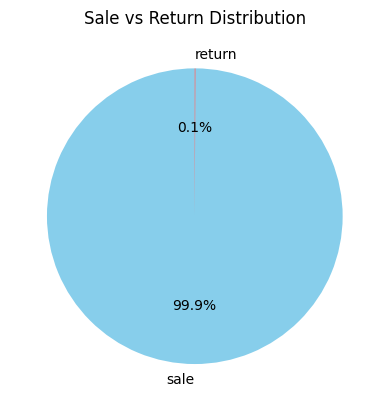

In [19]:
# Sales vs Return count
merged_df['Sale or Return'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title('Sale vs Return Distribution')
plt.ylabel('')
plt.show()

In [20]:
# Revenue by Discount Yes/No
discount_revenue = merged_df.groupby('Discount (Yes/No)')['Revenue'].sum()

## 🏷️ Revenue With vs Without Discount
We compare the total revenue of items sold with a discount versus those sold at full price, to see how discounts affect overall earnings.

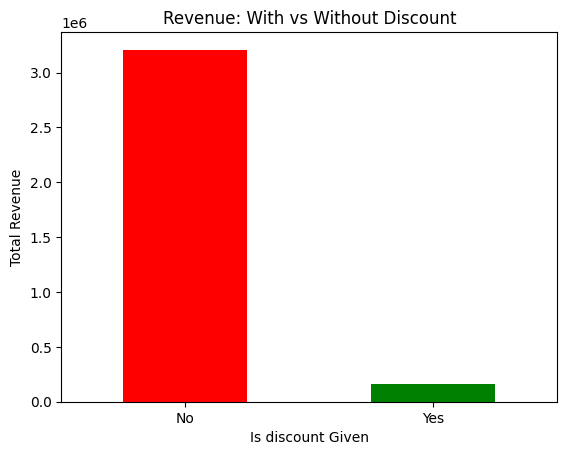

In [24]:
# Plotting
discount_revenue.plot(kind='bar', color=['red', 'green'])
plt.title('Revenue: With vs Without Discount')
plt.xlabel('Is discount Given')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()